In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [4]:
dataset = load_iris()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
cv_score = np.mean(cross_val_score(clf, X_test, y_test))

recall, f1score, _, _ = report["macro avg"].values()

In [10]:
print(
    "--- Model evaluation ---",
    f"y predictions   : {y_pred[:10]}",
    f"y labels        : {y_test[:10]}",
    f"CV score        : {cv_score:.2f}",
    f"Average recall  : {recall:.2f}",
    f"Average F1 score: {f1score:.2f}",
    sep="\n"
)

--- Model evaluation ---
y predictions   : [0 0 2 0 2 1 0 2 0 1]
y labels        : [0 0 2 0 2 1 0 2 0 1]
CV score        : 1.00
Average recall  : 1.00
Average F1 score: 1.00


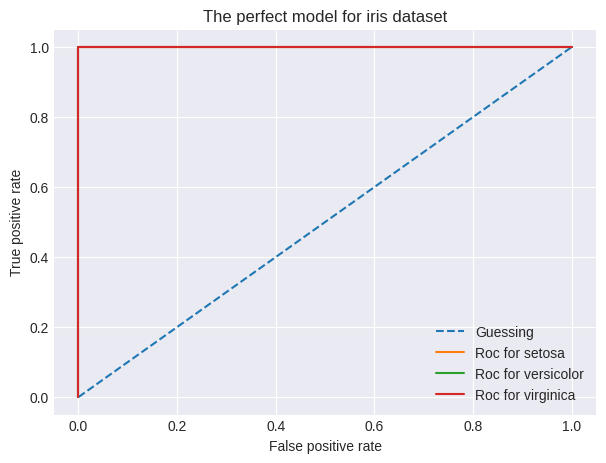

In [11]:
y_prob = clf.predict_proba(X_test)

fpr1, tpr1, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
fpr2, tpr2, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
fpr3, tpr3, _ = roc_curve(y_test, y_prob[:, 2], pos_label=2)

plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(7, 5))
plt.title("The perfect model for iris dataset")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend([
    "Guessing",
    "Roc for " + dataset.target_names[0],
    "Roc for " + dataset.target_names[1],
    "Roc for " + dataset.target_names[2],
])
plt.show()

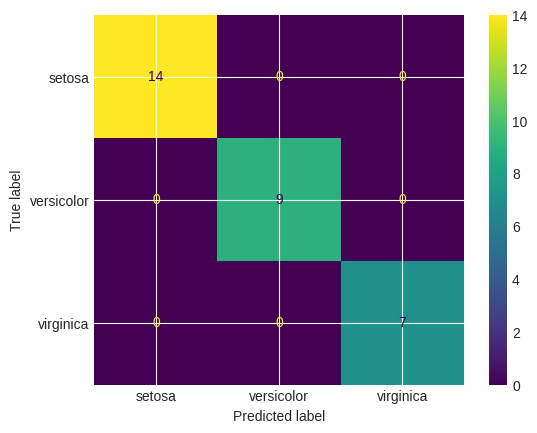

In [12]:
confmat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confmat, display_labels=dataset.target_names).plot()